# Chapter 11: Hands on Machine Learning for Computer Vision

***

<img src="./images/ML16c.png" alt="ML" width="1000"/>

***

<img src="./images/ML36.png" alt="ML" width="1000"/>

***

# Load Dataset

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)  # Convert labels to integers


***

<img src="./images/KNN0.png" alt="KNN" width="1000"/>

## Feature : Digit Area

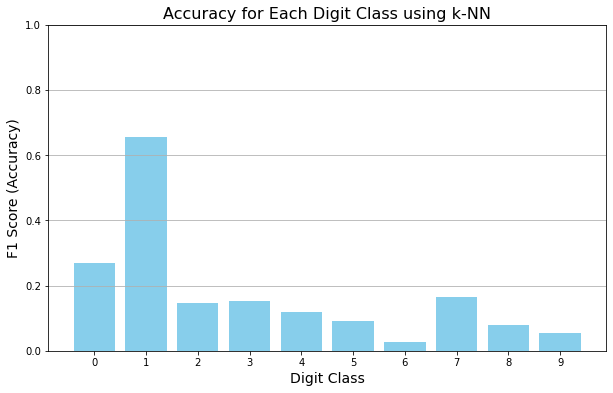

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate area (number of pixels with intensity > 10)
def calculate_area(image):
    # Convert the image to a NumPy array and reshape it to 28x28
    image = np.array(image).reshape(28, 28)
    # Calculate area by counting pixels with intensity > 10
    area = np.sum(image > 10)
    return area

# Apply the function to calculate the area for each image
X_area = np.array([calculate_area(np.array(image)) for image in X.to_numpy()])

# Reshape X_area to a 2D array to make it compatible with sklearn (as features need to be in 2D)
X_area = X_area.reshape(-1, 1)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_area, y, test_size=0.2, random_state=42)

# k-NN Classifier (using k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate accuracy for each class
class_report = classification_report(y_test, y_pred, output_dict=True)
class_accuracies = {str(i): class_report[str(i)]['f1-score'] for i in range(10)}

# Prepare data for plotting
classes = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Digit Class', fontsize=14)
plt.ylabel('F1 Score (Accuracy)', fontsize=14)
plt.title('Accuracy for Each Digit Class using k-NN', fontsize=16)
plt.xticks(classes)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

***

## Statistical Features : mean, variance, skewness, kurtosis

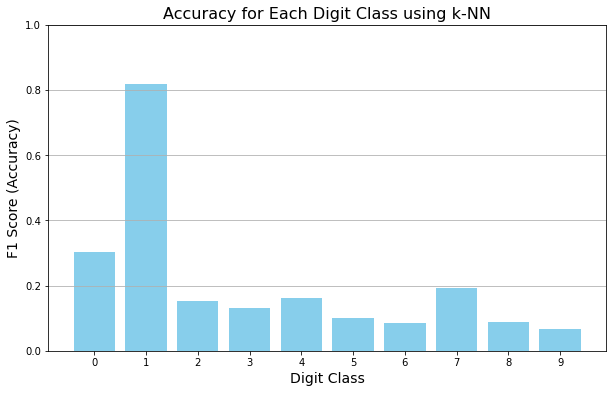

In [6]:
# Function to calculate statistical features
def extract_statistical_features(X):
    # Initialize an empty list to hold feature vectors
    features = []
    
    # Iterate through each image
    for image in X.values:
        # Calculate statistical features
        mean = np.mean(image)
        variance = np.var(image)
        skewness = np.mean(((image - mean) ** 3)) / ((np.std(image)) ** 3) if np.std(image) != 0 else 0
        kurtosis = np.mean(((image - mean) ** 4)) / ((np.std(image)) ** 4) if np.std(image) != 0 else 0
        
        # Append the features to the list
        features.append([mean, variance, skewness, kurtosis])
    
    return np.array(features)

# Extract statistical features
X_stat_features = extract_statistical_features(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_stat_features, y, test_size=0.2, random_state=42)

# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate accuracy for each class
class_report = classification_report(y_test, y_pred, output_dict=True)
class_accuracies = {str(i): class_report[str(i)]['f1-score'] for i in range(10)}

# Prepare data for plotting
classes = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Digit Class', fontsize=14)
plt.ylabel('F1 Score (Accuracy)', fontsize=14)
plt.title('Accuracy for Each Digit Class using k-NN', fontsize=16)
plt.xticks(classes)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

## HOG Features

Extracting HOG Features: 100%|█████████████████████████████████████████████████| 70000/70000 [01:01<00:00, 1143.27it/s]


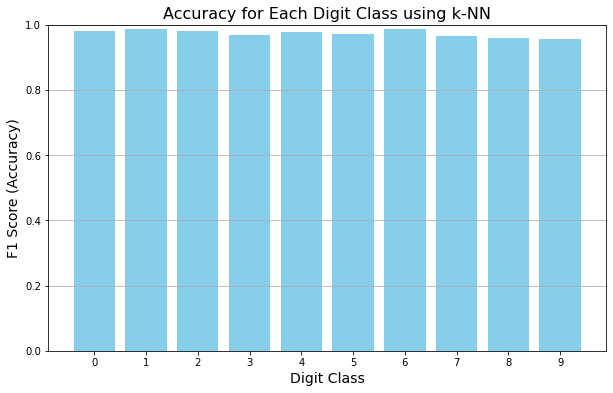

In [11]:
# Import necessary libraries
from skimage.feature import hog
from skimage import exposure
from tqdm import tqdm

# Function to compute HOG features for each image
def extract_hog_features(images):
    hog_features = []
    for image in tqdm(images, desc="Extracting HOG Features"):
        # Reshape and compute HOG features
        image = image.reshape(28, 28)  # Reshape to 28x28
        hog_feature = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

# Extract HOG features from the dataset
X_hog = extract_hog_features(X.to_numpy())

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate accuracy for each class
class_report = classification_report(y_test, y_pred, output_dict=True)
class_accuracies = {str(i): class_report[str(i)]['f1-score'] for i in range(10)}

# Prepare data for plotting
classes = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Digit Class', fontsize=14)
plt.ylabel('F1 Score (Accuracy)', fontsize=14)
plt.title('Accuracy for Each Digit Class using k-NN', fontsize=16)
plt.xticks(classes)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [15]:
# Print classification report to get accuracy for each class
print(classification_report(y_test, y_pred))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.98      0.98      0.98      1380
           3       0.97      0.96      0.97      1433
           4       0.99      0.97      0.98      1295
           5       0.99      0.96      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.96      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.94      0.97      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Overall Accuracy: 97.27%


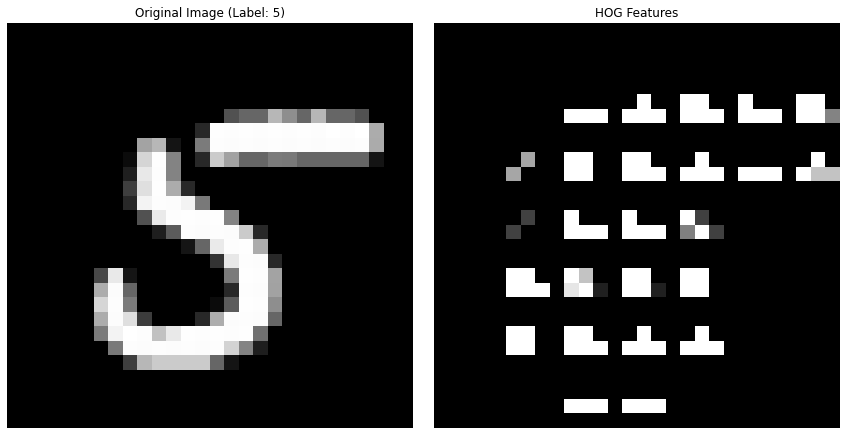

In [13]:
random_index = np.random.randint(0, len(X))  # Choose a random index

# Select a random image and label
random_image = X.iloc[random_index].to_numpy().reshape(28, 28)  # Reshape to 28x28
label = y.iloc[random_index]

# Function to compute HOG features
def extract_hog(image):
    hog_feature, hog_image = hog(image, pixels_per_cell=(4, 4), 
                                  cells_per_block=(2, 2), visualize=True, 
                                  multichannel=False)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))  # Rescale for better visualization
    return hog_image_rescaled

# Extract HOG features for the random image
hog_image = extract_hog(random_image)

# Plot the original image and the HOG image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(random_image, cmap='gray')
plt.title(f"Original Image (Label: {label})")
plt.axis('off')

# HOG Image
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.axis('off')

plt.tight_layout()
plt.show()

## Pixel Intensity Feature

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Overall Accuracy: 97.13%


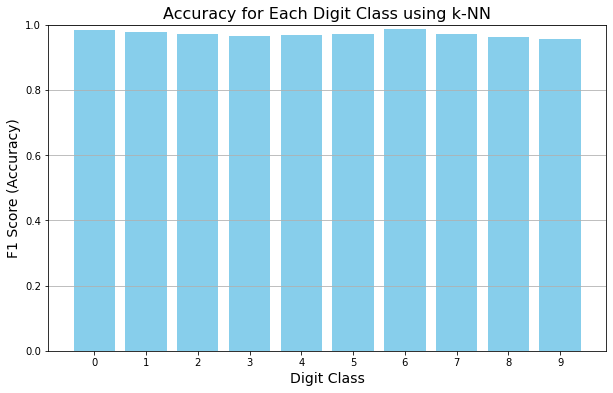

In [16]:
# Train/Test Split (using 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

# Print classification report to get accuracy for each class
print(classification_report(y_test, y_pred))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Calculate accuracy for each class
class_report = classification_report(y_test, y_pred, output_dict=True)
class_accuracies = {str(i): class_report[str(i)]['f1-score'] for i in range(10)}

# Prepare data for plotting
classes = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Digit Class', fontsize=14)
plt.ylabel('F1 Score (Accuracy)', fontsize=14)
plt.title('Accuracy for Each Digit Class using k-NN', fontsize=16)
plt.xticks(classes)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

<img src="./images/SVM1.png" alt="SVM" width="1000"/>

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.96      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.95      0.94      0.95      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Overall Accuracy: 96.82%


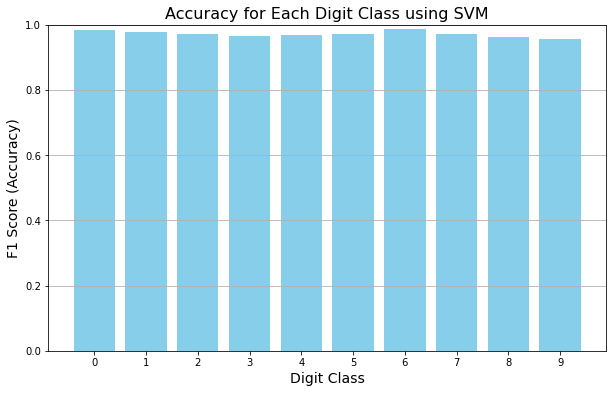

In [21]:
# Importing necessary libraries
from sklearn.svm import SVC

# SVM Classifier
svm = SVC(kernel='linear', random_state=42)  # You can also try other kernels like 'rbf'
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)

# Print classification report to get accuracy for each class
print(classification_report(y_test, y_pred))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Prepare data for plotting
classes = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Digit Class', fontsize=14)
plt.ylabel('F1 Score (Accuracy)', fontsize=14)
plt.title('Accuracy for Each Digit Class using SVM', fontsize=16)
plt.xticks(classes)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

<img src="./images/RF0.png" alt="RF" width="1000"/>

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.94      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.95      0.95      0.95      1273
           6       0.98      0.97      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.95      0.93      0.94      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

Overall Accuracy: 96.09%


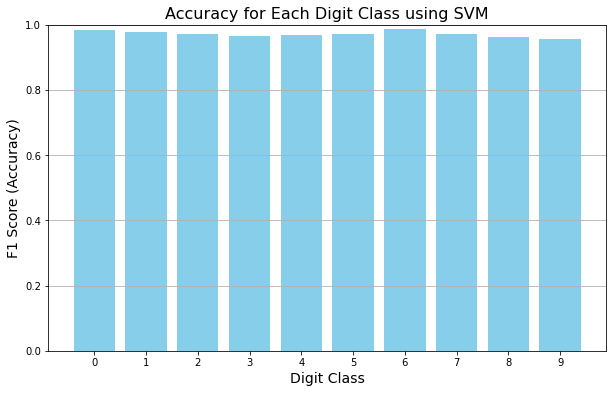

In [24]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)

# Print classification report to get accuracy for each class
print(classification_report(y_test, y_pred))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Prepare data for plotting
classes = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Digit Class', fontsize=14)
plt.ylabel('F1 Score (Accuracy)', fontsize=14)
plt.title('Accuracy for Each Digit Class using SVM', fontsize=16)
plt.xticks(classes)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()